In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.columns=['Month','Sales']

In [5]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [7]:
df.dropna(inplace=True)

In [8]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [9]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   105 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [11]:
df.shape

(105, 2)

In [12]:
#convert your datetime object into datetimepd.to_datetime
df['Month'] = pd.to_datetime(df.Month)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


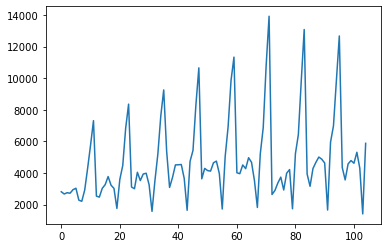

In [14]:
plt.plot(df.Sales)

In [15]:
df.set_index('Month',inplace=True)

In [16]:
df

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


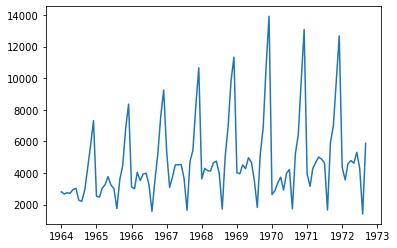

In [17]:
plt.plot(df.Sales)

# ADFuller 

In [18]:
from statsmodels.tsa.stattools import adfuller

In [20]:
result=adfuller(df.Sales)

In [21]:
result

(-1.8335930563276175,
 0.3639157716602477,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [22]:
result[1]

0.3639157716602477

In [23]:
p_value=result[1]

In [24]:
if p_value<=0.05:
    print('Rejecting the null hypo--series is stat')
else:
    print('Not Rejecting null hypo--series is not stat')

Not Rejecting null hypo--series is not stat


In [30]:
#example

In [26]:
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(1000)]
series = Series(series)

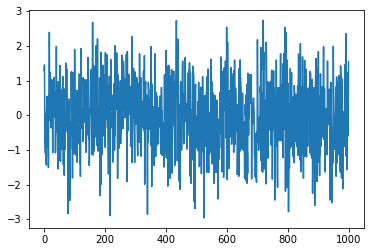

In [27]:
plt.plot(series)

In [28]:
result = adfuller(series)
if result[1]<=0.05:
    print("Rejecting null hypothesis--->Series is Stationary")
else:
    print("Not Rejecting null hypothesis--->Series is not Stationary")

Rejecting null hypothesis--->Series is Stationary


In [29]:
result[1]

0.0

# Non stationary-stationary

In [32]:
#Differencing


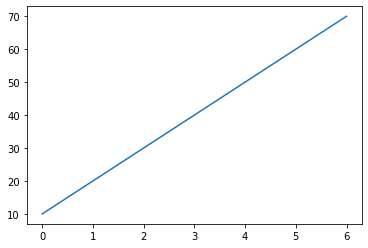

In [33]:
plt.plot([10,20,30,40,50,60,70])

In [35]:
sr1=pd.Series([10,20,30,40,50,60,70])

In [38]:
sr2=sr1.shift(1)

In [39]:
sr1

0    10
1    20
2    30
3    40
4    50
5    60
6    70
dtype: int64

In [40]:
sr2

0     NaN
1    10.0
2    20.0
3    30.0
4    40.0
5    50.0
6    60.0
dtype: float64

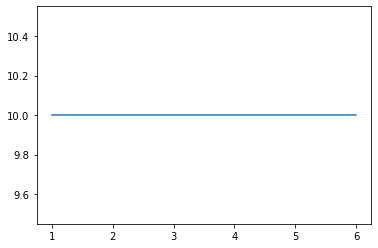

In [41]:
plt.plot(sr1-sr2)

In [42]:
df_diff=df['Sales']-df['Sales'].shift(1) #first order differencing

In [43]:
df_diff

Month
1964-01-01       NaN
1964-02-01    -143.0
1964-03-01      83.0
1964-04-01     -34.0
1964-05-01     225.0
               ...  
1972-05-01    -170.0
1972-06-01     694.0
1972-07-01   -1014.0
1972-08-01   -2885.0
1972-09-01    4464.0
Name: Sales, Length: 105, dtype: float64

In [44]:
result = adfuller(df_diff.dropna())
if result[1]<=0.05:
    print("Rejecting null hypothesis--->Series is Stationary")
else:
    print("Not Rejecting null hypothesis--->Series is not Stationary")

Rejecting null hypothesis--->Series is Stationary


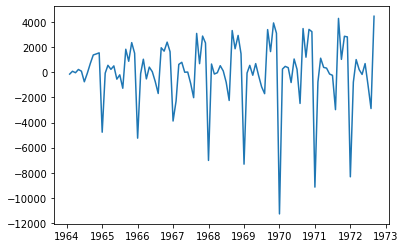

In [45]:
plt.plot( df['Sales']-df['Sales'].shift(1))